## Pretrained word2vec

You can download Malaya pretrained without need to import malaya.

#### word2vec from news

[size-32](https://s3-ap-southeast-1.amazonaws.com/huseinhouse-storage/v7/word2vec/word2vec-32.p)

[size-64](https://s3-ap-southeast-1.amazonaws.com/huseinhouse-storage/v7/word2vec/word2vec-64.p)

[size-128](https://s3-ap-southeast-1.amazonaws.com/huseinhouse-storage/v7/word2vec/word2vec-128.p)

[size-256](https://s3-ap-southeast-1.amazonaws.com/huseinhouse-storage/v7/word2vec/word2vec-256.p)

[size-512](https://s3-ap-southeast-1.amazonaws.com/huseinhouse-storage/v7/word2vec/word2vec-512.p)

#### word2vec from wikipedia

[size-256](https://s3-ap-southeast-1.amazonaws.com/huseinhouse-storage/v13/word2vec/word2vec-wiki-nce-256.p)

You will get a pickle file, contains `['nce_weights', 'dictionary']`.

To load that pickle file,
```python
import pickle
with open('file.p', 'rb') as fopen:
    word2vec = pickle.load(fopen)
```

But If you don't know what to do with malaya word2vec, Malaya provided some useful functions for you!

In [1]:
%%time
import malaya
%matplotlib inline

CPU times: user 12.1 s, sys: 1.52 s, total: 13.6 s
Wall time: 17.3 s


## Load malaya news word2vec

In [2]:
embedded_news = malaya.word2vec.load_news(256)

## Load malaya wikipedia word2vec

In [3]:
embedded_wiki = malaya.word2vec.load_wiki()

## Load word2vec interface

In [4]:
word_vector_news = malaya.word2vec.word2vec(embedded_news['nce_weights'], embedded_news['dictionary'])
word_vector_wiki = malaya.word2vec.word2vec(embedded_wiki['nce_weights'], embedded_wiki['dictionary'])

## Check top-k similar semantics based on a word

In [5]:
word = 'anwar'
print("Embedding layer: 8 closest words to: '%s'"%(word))
print(word_vector_news.n_closest(word=word, num_closest=8, metric='cosine'))

Embedding layer: 8 closest words to: 'anwar'
[['mahathir', 0.44774019718170166], ['beliau', 0.44170427322387695], ['zaid', 0.43993180990219116], ['hishammuddin', 0.4343132972717285], ['kuok', 0.43307822942733765], ['husam', 0.43213725090026855], ['anifah', 0.4307258129119873], ['pesakit', 0.4262162446975708]]


In [6]:
word = 'anwar'
print("Embedding layer: 8 closest words to: '%s'"%(word))
print(word_vector_wiki.n_closest(word=word, num_closest=8, metric='cosine'))

Embedding layer: 8 closest words to: 'anwar'
[['zaid', 0.7285637855529785], ['khairy', 0.6839416027069092], ['zabidi', 0.6709405183792114], ['nizar', 0.6695379018783569], ['harussani', 0.6595045328140259], ['shahidan', 0.6565827131271362], ['azalina', 0.6541041135787964], ['shahrizat', 0.6538639068603516]]


## Check batch top-k similar semantics based on a word

In [7]:
words = ['anwar', 'mahathir']
word_vector_news.batch_n_closest(words, num_closest=8,
                                 return_similarity=False)

[['anwar',
  'mahathir',
  'beliau',
  'zaid',
  'hishammuddin',
  'kuok',
  'husam',
  'anifah'],
 ['mahathir',
  'najib',
  'obama',
  'subramaniam',
  'anwar',
  'zamihan',
  'mujahid',
  'dzulkefly']]

What happen if a word not in the dictionary?

You can set parameter `soft` to `True` or `False`. Default is `True`.

if `True`, a word not in the dictionary will be replaced with nearest fuzzywuzzy ratio.

if `False`, it will throw an exception if a word not in the dictionary.

In [8]:
words = ['anwar', 'mahathir','husein-comel']
word_vector_news.batch_n_closest(words, num_closest=8,
                                 return_similarity=False,soft=False)

Exception: husein-comel not in dictionary, please use another word or set `soft` = True

In [9]:
words = ['anwar', 'mahathir','husein-comel']
word_vector_news.batch_n_closest(words, num_closest=8,
                                 return_similarity=False,soft=True)

[['anwar',
  'mahathir',
  'beliau',
  'zaid',
  'hishammuddin',
  'kuok',
  'husam',
  'anifah'],
 ['mahathir',
  'najib',
  'obama',
  'subramaniam',
  'anwar',
  'zamihan',
  'mujahid',
  'dzulkefly'],
 ['income',
  'wishes',
  'styles',
  'devices',
  'holographic',
  'proper',
  'refined',
  'moves']]

## Calculate vb - va + vc

In [10]:
print(word_vector_news.analogy('anwar', 'penjara', 'kerajaan', 5))

['penjara', 'kerajaan', 'kkm', 'kabinet', 'tuju']


In [11]:
print(word_vector_wiki.analogy('anwar', 'penjara', 'kerajaan', 5))

['penjara', 'kerajaan', 'kemaharajaan', 'pemerintah', 'pelabuhan']


## Word2vec calculator

You can put any equation you wanted.

In [12]:
word_vector_news.calculator('anwar + amerika + mahathir', num_closest=8, metric='cosine',
                      return_similarity=False)

['mahathir',
 'anwar',
 'amerika',
 'UNK',
 'najib',
 'husam',
 'kuok',
 'azalina',
 'mujahid']

In [13]:
word_vector_wiki.calculator('anwar + amerika + mahathir', num_closest=8, metric='cosine',
                      return_similarity=False)

['anwar',
 'mahathir',
 'hishammuddin',
 'sukarno',
 'khairy',
 'suffian',
 'ahmadinejad',
 'davutoglu',
 'shahrizat']

## Word2vec batch calculator

We can use Tensorflow computational graph to do distributed nearest-neighbors for us for fast suggestion!

In [14]:
equations = ['mahathir + najib'] * 10 # assumed we have 10 different equations

In [15]:
%%time
for eq in equations:
    word_vector_wiki.calculator(eq, num_closest=8, metric='cosine',return_similarity=False)

CPU times: user 1min 29s, sys: 7.02 s, total: 1min 36s
Wall time: 1min 37s


In [16]:
%%time
results = word_vector_wiki.batch_calculator(equations,num_closest=8)

CPU times: user 1min 33s, sys: 3.24 s, total: 1min 36s
Wall time: 1min 26s


If you are using GPU, or many cores, this will definitely speed up this process.

## Visualize scatter-plot

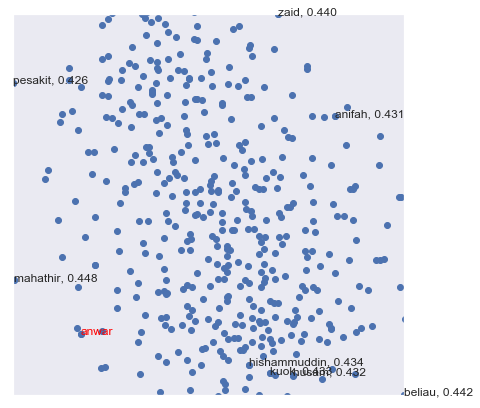

In [17]:
word = 'anwar'
result = word_vector_news.n_closest(word=word, num_closest=8, metric='cosine')
word_vector_news.scatter_plot(result, centre = word, notebook_mode = True)

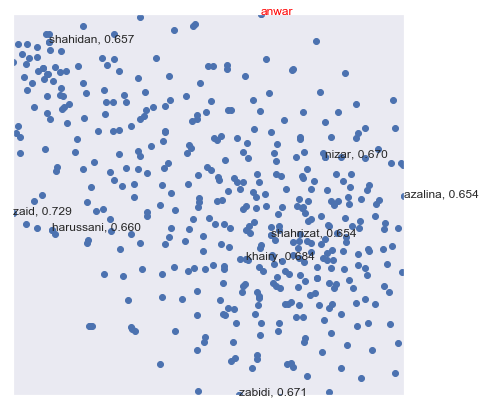

In [18]:
word = 'anwar'
result = word_vector_wiki.n_closest(word=word, num_closest=8, metric='cosine')
word_vector_wiki.scatter_plot(result, centre = word, notebook_mode = True)

## Visualize tree-plot

<Figure size 504x504 with 0 Axes>

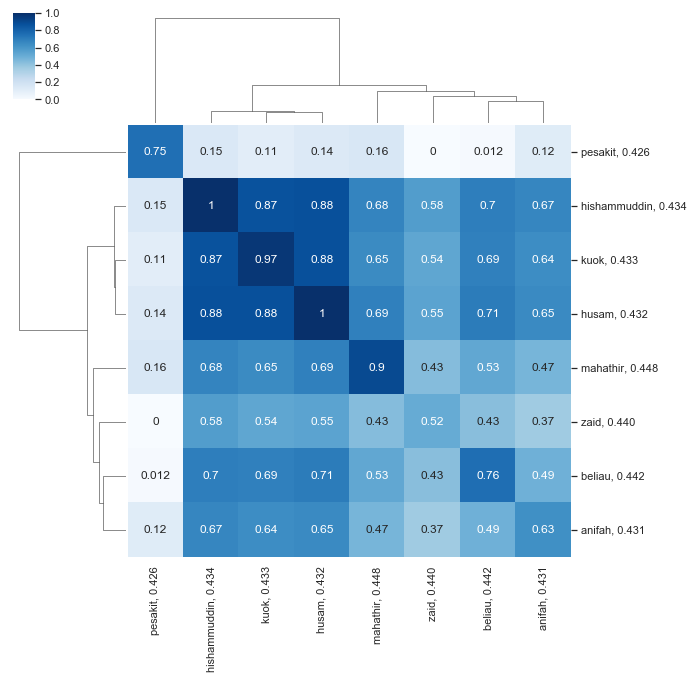

In [19]:
word = 'anwar'
result = word_vector_news.n_closest(word=word, num_closest=8, metric='cosine')
word_vector_news.tree_plot(result, notebook_mode = True)

<Figure size 504x504 with 0 Axes>

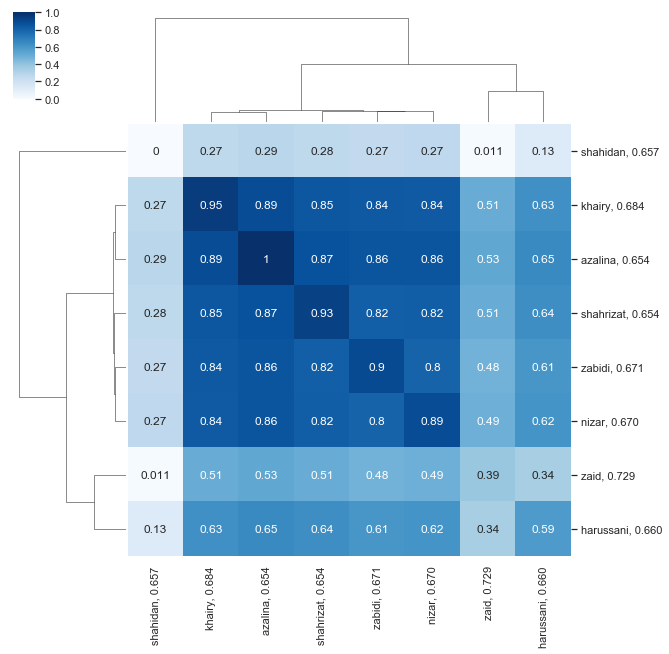

In [20]:
word = 'anwar'
result = word_vector_wiki.n_closest(word=word, num_closest=8, metric='cosine')
word_vector_wiki.tree_plot(result, notebook_mode = True)

## Get embedding from a word

If a word not found in the vocabulary, it will throw an exception with top-5 nearest words

In [21]:
word_vector_news.get_vector_by_name('husein-comel')

Exception: input not found in dictionary, here top-5 nearest words [income, husein, incomes, hussein, husseiny]

## Train on custom corpus

In [22]:
isu_kerajaan = ['Institusi raja khususnya Yang di-Pertuan Agong adalah kedaulatan negara dengan kedudukan dan peranannya termaktub dalam Perlembagaan Persekutuan yang perlu disokong dan didukung oleh kerajaan serta rakyat.',
               'Pensyarah Kulliyah Undang-Undang Ahmad Ibrahim, Universiti Islam Antarabangsa Malaysia (UIAM) Prof Madya Dr Shamrahayu Ab Aziz berkata perubahan kerajaan, susulan kemenangan Pakatan Harapan pada Pilihan Raya Umum Ke-14 pada Mei lepas, tidak memberi kesan dari segi peranan, fungsi dan kedudukan Yang di-Pertuan Agong.',
               'Peralihan kerajaan itu menyaksikan Sultan Muhammad V mencatat sejarah tersendiri dengan menjadi Yang di-Pertuan Agong Malaysia yang pertama memerintah dalam era dua kerajaan berbeza.',
               'Semasa dilantik sebagai Yang di-Pertuan Agong Ke-15 pada 13 Dis 2016, kerajaan ketika itu diterajui oleh Barisan Nasional dan pada 10 Mei lepas, kepimpinan negara diambil alih oleh Pakatan Harapan yang memenangi Pilihan Raya Umum Ke-14.',
               'Ketika merasmikan Istiadat Pembukaan Penggal Pertama, Parlimen ke-14 pada 17 Julai lepas, Seri Paduka bertitah mengalu-alukan pendekatan kerajaan Pakatan Harapan dalam menegakkan ketelusan terutamanya dengan mendedahkan kedudukan kewangan negara yang sebenar serta mengkaji semula perbelanjaan, kos projek dan mengurus kewangan secara berhemat bagi menangani kos sara hidup.',
               'Pada Jun lepas, Sultan Muhammad V memperkenankan supaya peruntukan gaji dan emolumen Yang di-Pertuan Agong dikurangkan sebanyak 10 peratus sepanjang pemerintahan sehingga 2021 berikutan keprihatinan Seri Paduka terhadap tahap hutang dan keadaan ekonomi negara.',
               'Seri Paduka turut menitahkan supaya Majlis Rumah Terbuka Aidilfitri tahun ini tidak diadakan di Istana Negara dengan peruntukan majlis itu digunakan bagi membantu golongan yang kurang bernasib baik.']

In [23]:
embed_weights, nce_weights, dictionary = malaya.word2vec.train(isu_kerajaan)

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


train minibatch loop:   0%|          | 0/8 [00:00<?, ?it/s, cost=30.8]

model built, vocab size 157, document length 239


test minibatch loop: 100%|██████████| 1/1 [00:00<00:00, 186.12it/s, cost=5.2]


In [24]:
trained_word2vec = malaya.word2vec.word2vec(nce_weights, dictionary)

In [25]:
word = 'paduka'
print("Embedding layer: 8 closest words to: '%s'"%(word))
print(trained_word2vec.n_closest(word=word, num_closest=8, metric='cosine'))

Embedding layer: 8 closest words to: 'paduka'
[['itu', 0.5166147947311401], ['END', 0.5115543007850647], ['nasional', 0.5072782039642334], ['sebagai', 0.5061907768249512], ['kos', 0.504166841506958], ['UNK', 0.49253714084625244], ['antarabangsa', 0.4919373393058777], ['ketika', 0.48901939392089844]]
